# Imports and Datasets Preparations

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from pprint import pprint

## Titanic Dataset for Classification

In [2]:
titanic_data = pd.read_csv('datasets/titanic/titanic_dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# split train, validation and test data: 70:15:15 division
# use random seed to have always the same split if we make different analyses

training_data_clas = titanic_data.sample(frac=0.7, random_state=1234)
data_without_train_clas = titanic_data.drop(training_data_clas.index)
validation_data_clas = data_without_train_clas.sample(frac=0.5, random_state=27)
test_data_clas = data_without_train_clas.drop(validation_data_clas.index)

In [4]:
print(f'Dataset split:\ntraining data: {(len(training_data_clas))}\nvalidation data: {(len(validation_data_clas))}\ntest data: {(len(test_data_clas))}')

Dataset split:
training data: 624
validation data: 134
test data: 133


In [5]:
# for curiosity check how many female and male survived

woman = training_data_clas.loc[training_data_clas.Sex == 'female']['Survived'] # 1: survived, 0: died
rate_woman_survived = sum(woman) / len(woman)
rate_woman_survived

0.7358490566037735

In [6]:
men = training_data_clas.loc[training_data_clas.Sex == 'male']['Survived']
rate_men_survived = sum(men) / len(men)
rate_men_survived

0.19174757281553398

### Features and Target preparation

In [7]:
# the prediction to learn
                
y = training_data_clas['Survived'] # Target of training set
y_val = validation_data_clas['Survived'] # Target of validation set
y.head()

523    1
778    0
760    0
496    1
583    0
Name: Survived, dtype: int64

In [8]:
# the features vector, where we create dummies values to be evaluated

features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X = pd.get_dummies(training_data_clas[features])
X_val = pd.get_dummies(validation_data_clas[features])
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
523,1,0,1,1,0
778,3,0,0,0,1
760,3,0,0,0,1
496,1,1,0,1,0
583,1,0,0,0,1


## Boston Housing Dataset for Regression

In [9]:
boston_housing = pd.read_csv('datasets/boston_housing/BostonHousing.csv')
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
training_data_reg = boston_housing.sample(frac=0.7, random_state=1234)
data_without_train_reg = boston_housing.drop(training_data_reg.index)
validation_data_reg = data_without_train_reg.sample(frac=0.5, random_state=27)
test_data_reg = data_without_train_reg.drop(validation_data_reg.index)

In [12]:
print(f'Dataset split:\ntraining data: {(len(training_data_reg))}\nvalidation data: {(len(validation_data_reg))}\ntest data: {(len(test_data_reg))}')

Dataset split:
training data: 354
validation data: 76
test data: 76


### Features and Target preparation

In [13]:
# target training and validation
                
yreg = training_data_reg['medv'] # Target of training set
yreg_val = validation_data_reg['medv'] # Target of validation set
yreg.head()

64     33.0
100    27.5
400     5.6
485    21.2
454    14.9
Name: medv, dtype: float64

In [14]:
# the features vector

features_reg = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

Xreg = training_data_reg[features_reg]
Xreg_val = validation_data_reg[features_reg]
Xreg.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05
100,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
400,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58
454,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71


# Logistic Regression & Linear Regression

## Logistic Regression

Logistic Regression is well-known and widely used statistical classification method. It computes the probability of assigning a class to a sample:
$$ P(y_i|X_i) $$
For this purpose logistic regression use the sigmoid functions:
$$ P(y_i = +1 |X_i) = \frac{1}{1+e^{-Score(X_i)}} $$
where:
$$ Score(X_i) = w_1 x_1 + .... + w_n x_x = h_i(X_i) $$
<div>
<center><img src="images/sigmoid.png" width="400" center=/></center>
</div>
Logistic Regression search for the weight vector $ W $ which correspond to the highest likelihood:
$$ l(W) = \prod{P(y_i|X_i,W_i)} $$
To find the best weights, it performs a gradient ascent on the log likelihood function:
$$ ll(W) = \ln{l(W)} $$
Which updates weights $i$ using:
$$  \frac{\partial ll}{\partial w_i} = \sum{h_i(X_i)(1[y_i = +1] - P(y = +1|X_i, W))} $$
so the update is made in this way:
$$ w_i = w_i - \alpha\frac{\partial ll}{\partial w_i} $$ 
where $\alpha$ is the learning rate

In [15]:
from sklearn.linear_model import LogisticRegression
from pprint import pprint

lr_model = LogisticRegression()
pprint(lr_model.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### Main Parameters

The main parameters of logistic regression are:
- solver: is the algorithm to use in the optimization problem
    - lbfgs: relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.
    - sag faster than other solvers for large datasets, when both the number of samples and the number of features are large.
    - saga: the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.
    - newton-cg computationally expensive because of the Hessian Matrix.
    -liblinearrecommended when you have a high dimension dataset - solving large-scale classification problems.
- penalty: it regulate the overfitting of the model penalizing the weights fitting to much the training data
    - l1: lasso
    - l2: ridge regression
    - elasticnet
    - none
- C: regularization strength works with the penalty to regulate overfitting
    - small values: specify stronger regularization
    - high values: less regularization

In [16]:
# in this case use defaults values but we could do a search grid search

lr_model = lr_model.fit(X, y)
lr_preds = lr_model.predict(X_val)
accuracy_score(lr_preds, y_val)

0.7686567164179104

## Linear Regression

Linear regression is a well-known regression model to predict continuous targets:
- Given N Samples (X, y), X: the vector of features, y: the target, linear regression computes a model:
$$
\hat{y} = w_0 + w_1x_i + ... + w_Nx_i
$$
- We evaluate the model by computing the RSS (Resdidual Sum of Squared):
$$
RSS(w_0,...,w_N) = \sum_{i=1}^{N}{(y_i - \hat{y_i})^2} = \sum_{i=1}^{N}{(y_i - (w_0 + w_1x_i + ... + w_Nx_i))^2}
$$
- The goal is to find the weights that minimize the RSS
$$
w_0,...,w_N = \arg\min_{w_0,...,w_N}{RSS(w_0,...,w_N)}
$$
- To solve this we have two approach
    - $RSS(w_0,...,w_N) = 0$: high computation
    - apply gradient descent until convergence
I show a graphical simplify example with only one features dimension, the training data:
<div>
<center><img src="images/linear_reg/training_data.png" width="400" center=/></center>
</div>
A simple linear regression model an them:
<div>
<center><img src="images/linear_reg/reg_model.png" width="400" center=/></center>
</div>
To evaluate the regression problems we are going to use $R^2$ metrics:
$$
TSS = \sum_{i=1}^{N}{(y_i - \hat{y_i})^2}
$$
$$
R^2 = 1 - \frac{TSS}{RSS}
$$
R2 measures of how well the regression line approximates the real data points. When R2 is 1, the regression line perfectly fits the data.

In [17]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
pprint(reg_model.get_params())

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


In [18]:
reg_model.fit(Xreg, yreg)
reg_preds = reg_model.predict(Xreg_val)
r2_score(reg_preds, yreg_val)

0.28648680667869086

# Naive Bayes

Naive Bayes method are a set of supervised learning algorithms based on applying Bayes' theorem with the 'naive' assumption of conditional independence between every pair of features given the value of the class variable.
<br>
Given the target y and the example x described by $n$ attributes, Bayes Theorem says that:
$$
P(y|X) = \frac{P(X|y)P(y)}{P(X)}
$$
As just said, Naive Bayes assume that attributes are statistically independent. Thus, evidence splits into parts that are independent:
$$
P(y|X) = \frac{P(x_1|y)...P(x_n|y)P(y)}{P(X)}
$$
where: 
- $P(y)$ is the a priori probability of y, which is the probability of event before evidence is seen. So it can be easily computed since it is the then relative frequency of the class $y$ in the training set
- $P(C|A)$ is the a posteriori probability of y, which is the probability of event after the evidence is seen
<br>
In spite of their apparently over-simplified assumptions, Naive Bayes works quite well in many real-world situations. In addition, it can be extremely fast compared to more sophisticated methods.
<br>
On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
<br><br>
Here we are going to analyze:
- Gaussian Naive Bayes
- Multinomial Naive Bayes

## Gaussian Naive Bayes

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:
$$
P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} e^{(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2})}
$$
where $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(X, y)
gnb_preds = gnb_model.predict(X_val)
accuracy_score(gnb_preds, y_val)

0.7686567164179104

## Multinomial Naive Bayes

MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification 

# KNN (K-Nearest Neighbor)

K-Nearest Neighbor is one of the simplest form of learning. To decide the label for an unseen sample, consider from the training data which are more similar to the unknown one. The training dataset is the model itself, it is the knowledge, the similarity function defines what's learned.
<br>
The most notable similarity measure are:
- Euclidean distance (Minkowski): the typical function to compute the similarity between two samples:
$$
d(p,q) = \sqrt{\sum{(p_i - q_i)^2}}
$$
- Manhattan distance: l1 loss
$$
d(p,q) = {\sum{|(p_i - q_i)}|}
$$
- Cosine distance: it is the angle that the vectors to those points make. This angle will be in the range 0 to 180 degrees, regardless of how may dimensions the space has
$$
d(X,Y) = \arccos{\frac{\sum{x_iy_i}}{\sqrt{\sum{x_i^2}}\sqrt{\sum{y_i^2}}}}
$$
- Jaccard distance: it is a measure of how dissimilar two sets are
- Hamming distance: it is the number of components in which they differ (e.g. v1=10101, v2=11110, HammingD= 3/5)

## Classification

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
pprint(knn_model.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### Main Parameters

The main parameters of knn are:
- n_neighbors: the number of neighbors to use
- metric: the similarity function to use
- p: This is the power parameter for the Minkowski metric. When p=1, this is equivalent to using manhattan_distance(l1), and euclidean_distance(l2) for p=2
- algorithm: the algorithm used to compute the nearest neighbors:
    - ‘ball_tree’ will use BallTree
    - ‘kd_tree’ will use KDTree
    - ‘brute’ will use a brute-force search.
    - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
- leaf_size: leaf size passed to BallTree or KDTree

In [21]:
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
knn_preds = knn_model.predict(X_val)
#accuracy_score(knn_preds, y_val)
print(classification_report(knn_preds, y_val))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        96
           1       0.55      0.82      0.66        38

    accuracy                           0.76       134
   macro avg       0.73      0.78      0.74       134
weighted avg       0.81      0.76      0.77       134



/Users/lucacolombo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Regression

In [22]:
# parameter analysis is very similar to that done previously for the classification model

from sklearn.neighbors import KNeighborsRegressor

knnreg_model = KNeighborsRegressor()
pprint(KNeighborsRegressor().get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [23]:
knnreg_model.fit(Xreg, yreg)
knnreg_preds = knnreg_model.predict(Xreg_val)
r2_score(yreg_val, knnreg_preds)

0.29557543400826947

# SVM (Support Vector Machine)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
<br>
The objective of the SVM algorithm is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies the data.
<br>
For simplicity, we consider an example with 2 classes:
<center><img src="images/svm/classes.png" width="350" center=/></center>
As we can see we should split this two classes with many different hyperplanes, what do we choose?
<center><img src="images/svm/hyperplanes.png" width="350" center=/></center>
SVM works by searching for the hyperplane which maximizes the margin or the largest $\gamma$ such that:
$$
\forall{i,y_i}(wx_i + b) >= \gamma
$$
<center><img src="images/svm/optimization.png" width="350" center=/></center>
The support vectors are the data points that are closer to the hyperplane and influence the position and orientation of this one. In addition we can using only these support vectors to classify our new points instead of all the dataset. Using this techniques guaranteed a more robust classifier.

The advantages of support vector machines are:
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

## Classification

In [24]:
# in our dataset we will be using SCV which is a specific type of SVM which is used with classification application

from sklearn.svm import SVC

svc_model = SVC()
pprint(svc_model.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


### Main Parameters

the main parameters for SVC are:

- kernel: it selects the type of hyperplane used to separate the data
    - linear: a linear hyperplane
    - rfb: a non-linear hyperplane
    - poly: a non-linear hyperplane
    - sigmoid
- gamma: a parameter for non linear hyperplanes, higher the value more tries to fit the training data (risk overfitting)
- C: regularization parameter, the penalty is a squared l2 penalty (higher more regularization, risk underfitting)
- degree: parameter for poly kernel, we can choose the degree of the polynomial used for the hyperplane (using =1 is the same of use linear kernel, greater it fits more the training data)

In [25]:
svc_model.fit(X, y)
svc_preds = svc_model.predict(X_val)
#accuracy_score(svc_preds, y_val)
print(classification_report(svc_preds, y_val))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        85
           1       0.68      0.78      0.72        49

    accuracy                           0.78       134
   macro avg       0.77      0.78      0.77       134
weighted avg       0.79      0.78      0.79       134



## Regression

In [26]:
# parameter analysis is very similar to that done previously for the classification model

from sklearn.svm import SVR

svmreg_model = SVR()
pprint(svmreg_model.get_params())

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [27]:
svmreg_model.fit(Xreg, yreg)
svmreg_preds = svmreg_model.predict(Xreg_val)
r2_score(yreg_val, svmreg_preds)

0.13530293450130937

# KRR (Kernel Ridge Regression)

Kernel Ridge Regression models are nonparametric regression models which are able to deal with linear and nonlinear relationship. Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It thus learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space.
<br>
The form of the model learned by KRR is identical to SVR. Different loss function are used:
- KRR: uses squared error loss
- SVR: uses epsilon-intensive loss

KRR is done in close-form so with medium datesets is faster than SVR. On the other hand, SVR scales better on larger datasets.

## Note
Kernel Trick: Kernel methods owe their name to the use of kernel functions, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit computation of the coordinates.

In [9]:
from sklearn.kernel_ridge import KernelRidge

krr_model = KernelRidge()
pprint(krr_model.get_params())

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'linear',
 'kernel_params': None}


## Main Parameters

The main parameters for Kernel Ridge Regression are:
- alpha: regularization coefficient. Larger the value, greater regularization
- kernel: kernel mapping used internally (use documentation)
- gamma: parameters for some kernels
- degree: degree of the polynomial kernel (ignored by other kernels)

In [16]:
krr_model.fit(Xreg, yreg)
krr_preds = krr_model.predict(Xreg_val)
r2_score(yreg_val, krr_preds)

0.4418097164269671

# Bayesian Ridge Regression

## Bayesian Regression
Before we need to introduce the idea of the Bayesian Regression. In the Bayesian, we formulate linear regression using probability distributions rather than point estimates. The target y, is not estimated as a single value, but it is assumed to be drawn from a probabilistic distribution. So each y is seen as a sample, which is sampled from a normal distribution, where the normal distribution parameters are treated as random variable which are estimated from the data:
$$
y = \mathcal{N}(W^T X,\,\sigma^{2}I)
$$
Where:
- the mean: $W^T$ weight multiplied by the data points
- the variance is the square of the standard deviation multiplied by the Identity matrix (because we have multidimensional data)
<br>
The aim of Bayesian Linear Regression is not to find the single “best” value of the model parameters, but rather to determine the posterior distribution for the model parameters. Using the Bayesian' rules:
$$
p(W | data) = \frac{p(data | W) * p(W)}{p(data)}
$$
where:
- $p(W | data)$ is the posterior probability of parameters W given training data
- $p(data | W)$ is the probability (likelihood) of observing D given W
- $p(W)$ is the prior probability over the parameters
- $p(data)$ is the marginal likelihood (normalizing constant)

We want the most probable value of W given the data: maximum a posteriori (MAP). It is the mode of the posterior.
<br>
To clarify the idea:
- Priors: If we have domain knowledge, or a guess for what the model parameters should be, we can include them in our model, unlike in the frequentist approach which assumes everything there is to know about the parameters comes from the data. If we don’t have any estimates ahead of time, we can use non-informative priors for the parameters such as a normal distribution.
- Posterior: The result of performing Bayesian Linear Regression is a distribution of possible model parameters based on the data and the prior. This allows us to quantify our uncertainty about the model: if we have fewer data points, the posterior distribution will be more spread out.

As the amount of data points increases, the likelihood washes out the prior, and in the case of infinite data, the outputs for the parameters converge to the values obtained from OLS.
<br>
Here a visual examples:
<center><img src="images/brr/blr.png" width="450" center=/></center>

## Bayesian Ridge
Bayesian Ridge estimates a probabilistic model of the regression problem as described above but the prior for the coefficient is given by a spherical Gaussian, so used the idea of the ridge regression instead only of the linear regression.
The ridge minimize the classical linear least squared adding the l2 penalty.

In [17]:
from sklearn.linear_model import BayesianRidge

brr_model = BayesianRidge()
pprint(brr_model.get_params())

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'normalize': 'deprecated',
 'tol': 0.001,
 'verbose': False}


## Main Parameters

The main parameters for Bayesian Ridge Regression are:
- n_iter: max number of iteration
- tol: convergence parameter, if w changes < tol stop the the algorithm 

In [18]:
brr_model.fit(Xreg, yreg)
brr_preds = brr_model.predict(Xreg_val)
r2_score(yreg_val, brr_preds)

0.4700037663317521

# ElasticNet Regression

ElasticNet Regression is a regularized regression method which linearly combines the l1 (Lasso) and l2 (Ridge) penalties. The object function will be:
$$
J(W) = \frac{1}{N}\sum_{i}^{N}{(y - \hat{y})^2} + r\lambda\sum_{j}^{M}{|w_j|} + \frac{1 - r}{2}\lambda\sum_{j}^{M}{w_j^2}
$$
where:
- $\frac{1}{N}\sum_{i}^{N}{(y - \hat{y})^2}$: the mean squared error loss function <p>
- $r\lambda\sum_{j}^{M}{|w_j|}$: l1 penalty (Lasso) <p>
- $\frac{1 - r}{2}\lambda\sum_{j}^{M}{w_j^2}$: l2 penalty (Ridge) <p>

Elastic net regression acts as both lasso and ridge, and we can control its behavior with a hyperparameter known as L1 ratio, mathematically denoted as ‘r’. A value of r is set between 0 and 1. If r=0.5,  elastic net behaves like Lasso and Ridge equivalently. But, when we start decreasing the value of r from 0.5 to 0, Elastic net behaves roughly as Ridge, but at 0, it completely behaves as Ridge regression. If the value of r changes from 0.5 to 1, Elastic net behaves like Lasso, but at 1, it will completely behave as Lasso regression.

In [15]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet()
pprint(en_model.get_params())

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


## Main Parameters

The ElasticNet main parameters are:
- l1_ratio: the elastic mixing parameter. For $l1\_ratio = 0$ the penalty is an L2 penalty. For $l1\_ratio = 1$ it is an L1 penalty. For $0 < l1\_ratio < 1$, the penalty is a combination of L1 and L2.
- alpha: Constant that multiplies the penalty terms. $alpha = 0$ is equivalent to an ordinary least square (as linear regression problem)
- max_iter: max number of iterations
- tol: tolerance for optimization convergence

In [16]:
en_model.fit(Xreg, yreg)
en_preds = en_model.predict(Xreg_val)
r2_score(yreg_val, en_preds)

0.47673568102491004

# SGD Classifier/Regression (Stochastic Gradient Descent Classifier/Regression)

This could make people misunderstand, in this case SGD is not the optimizer. Instead, it is a linear classifier (we can choose between SVM, logistic regression, ...), which is optimized using the SGD algorithm.
<br>
The advantages of Stochastic Gradient Descent are:
- Efficiency.
- Ease of implementation (lots of opportunities for code tuning).

The disadvantages of Stochastic Gradient Descent include:
- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
- SGD is sensitive to feature scaling.

<center><img src="images/sgd.gif" width="450" center=/></center>

## Classification

In [28]:
from sklearn.linear_model import SGDClassifier

sgdc_model = SGDClassifier()
pprint(sgdc_model.get_params())

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


### Main Parameters

SGD Classifier main parameters:
- loss: the loss function to be used
    - hinge: gives a linear SVM
    - log_loss: gives logistic regression (probabilistic classifier)
    - look doc for others
- penalty: the regularization term to be used
    - l2
    - l1
    - None
- alpha: constant that multiplies the regularization term (higher value -> stronger regularization)
- max_iter: the maximum number of iterations for the sgd algorithm (the epochs)
- tol: the stopping criterion, raining will stop when (loss > best_loss - tol). Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter
- early_stopping: Whether to use early stopping to terminate training when validation score is not improving. If set to True, it will automatically set aside a stratified fraction of training data as validation and terminate training when validation score returned by the score method is not improving by at least tol for n_iter_no_change consecutive epochs.
- learning_rate: learning rate schedule
    - ‘constant’: eta = eta0
    - ‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
    - ‘invscaling’: eta = eta0 / pow(t, power_t)
    - ‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.
- eta0: the initial_learning for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.0 as eta0 is not used by the default schedule ‘optimal’.
- validatio_fraction: The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True.

In [29]:
sgdc_model.fit(X, y)
sgdc_preds = sgdc_model.predict(X_val)
#accuracy_score(sgdc_preds, y_val)
print(classification_report(sgdc_preds, y_val))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80        96
           1       0.54      0.79      0.64        38

    accuracy                           0.75       134
   macro avg       0.72      0.76      0.72       134
weighted avg       0.79      0.75      0.76       134



## Regression

In [30]:
# parameter analysis is very similar to that done previously for the classification model

from sklearn.linear_model import SGDRegressor

sgdreg_model = SGDRegressor()
pprint(sgdreg_model.get_params())

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [31]:
sgdreg_model.fit(Xreg, yreg)
sgdreg_preds = sgdreg_model.predict(Xreg_val)
r2_score(yreg_val, sgdreg_preds)

-1.8819985953312979e+25

# Decision Tree

Decision trees are non-parametric methods for classification and regression. The object is to create a model that predicts the value of the target by learning simple decision rules inferred from the data features.
<br>
Here report a categorical example:
<center>
    <img src="images/decision_trees/dataset_tree_cat.png" width="400" center=/>
    <img src="images/decision_trees/cat_tree.png" width="360" center=/>
</center>
<br>
<br>
To better understand the geometric interpretation of a decision tree, consider the following example:
<br>
For simplicity, here we have two numerical variable $x_1$ and $x_2$ and what to classify two classes, the final trees look like this:
<center><img src="images/decision_trees/numerical_tree.png" width="350" center=/></center>
The geometrical interpretation is the following:
<center><img src="images/decision_trees/geometrical_tree.png" width="350" center=/></center>

Some advantages of decision trees are:
- Simple to understand and to interpret. Trees can be visualized.
- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
pprint(dt_model.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


## Main Parameters

The main parameters for Decision Trees are:
- criterion: the function to evaluate the quality of a split, the main ones:
    - entropy: $H(E) = -\sum{p_j\log p_j}$
    - gini: $Gini(E) = 1 - \sum{p_j^2}$ 
- splitter: the strategy used to make the split
    - best: best feature based on the impurity measure 
    - random: select a random feature
- max-depth: maximum depth of the tree, if None it expands until leave are pure (risk of overfitting)
- min_sample_split: the minimum number of samples required to split an internal node, rule of thumb [1, 40], this value is used to control overfitting
- mean_sample_leaf: the minimum number of samples required to be at a leaf node, rule of thumb [1, 20]
- max_features: the number of features to consider when looking for the best split

In [33]:
dt_model.fit(X, y)
dt_preds = dt_model.predict(X_val)
#accuracy_score(dt_preds, y_val)
print(classification_report(dt_preds, y_val))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        83
           1       0.64      0.71      0.67        51

    accuracy                           0.74       134
   macro avg       0.73      0.73      0.73       134
weighted avg       0.74      0.74      0.74       134



# RandomForest

## Ensemble Methods
Before analyzing the Random Forest, I have to introduce the concept of ensemble methods, there are two main kind of these:
- Bagging
- Boosting

### Bagging Method
Bagging is an aggregation of independent generating models of the same kind, where the prediction is the combined voting/average of all the models. Baggings is a good idea when it is used to combine unstable classifier such as decision trees, regression trees, linear regression, neural networks:
- it is used to stabilize the unstable classifier, aggregating them
- it reduces the overall variance and keeping the bias unchanged
- reduce the overfitting of these high variance classifier (if they are taken separately)
- each new model is independent of the other
- the training data is random with bootstrap

### Boosting Method
Boosting merges a sequence of simple classifier by correcting itself over the misclassified data. As said it is a good idea when using stable and simple classifier such as KNN or model with strong regularizations:
- it reduces the overall bias, keeping variance unchanged
- each model is dependent of the previous one when trained
- the training data is the misclassified previus dataset

## Random Forest Classifier/Regression

Random Forests are an application of the bagging method. They are ensembles of unpruned decision tree learners with randomized selection of features at each split.
<br>
The generalization error of a forest of tree classifiers depends on:
- The strength of the individual trees in the forest
- The correlation between them

### Classification

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
pprint(rf_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


#### Main Parameters

These are a lot of parameters, we are interested in:
- criterion: function used to measure the quality of a split for each tree, main
    - entropy
    - gini
- n_estimators: number of trees in the forest
- max_features: max number of features considered for splitting a node
- max_depth: max number of levels in each decision tree
- min_samples_split: min number of data points placed in a node before the node is split
- min_samples_leaf: min number of data points allowed in a leaf node
- bootstrap: method for sampling data points (with or without replacement)

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(X, y)
rf_preds = rf_model.predict(X_val)
#accuracy_score(rf_preds, y_val)
print(classification_report(rf_preds, y_val))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        77
           1       0.70      0.68      0.69        57

    accuracy                           0.74       134
   macro avg       0.73      0.73      0.73       134
weighted avg       0.74      0.74      0.74       134



<AxesSubplot:>

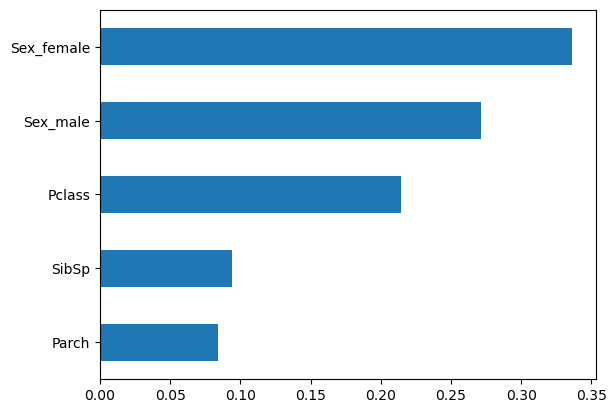

In [36]:
# print feature importances created in randomForest

importances = rf_model.feature_importances_
importances
forest_importances = pd.Series(importances, index=X.columns)
forest_importances = forest_importances.sort_values()
forest_importances.plot(kind='barh')

### Regression

In [37]:
# parameter analysis is very similar to that done previously for the classification model

from sklearn.ensemble import RandomForestRegressor

rfreg_model = RandomForestRegressor()
pprint(rfreg_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [38]:
rfreg_model.fit(Xreg, yreg)
rfreg_preds = rfreg_model.predict(Xreg_val)
r2_score(yreg_val, rfreg_preds)

0.6370227935137224

## RandomForest Search Grid Cross-Validation

### Random Hyperparamter Grid & Searching
We use an initial random grid to find a closer range, so later we can apply the grid search in a lower range search.

In [39]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=5, stop=50, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# create the random grid

random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [40]:
# now we can do the search on the training set
# we use 3 fold cross validation over 100 different combinations

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=100, cv=3, verbose=2, n_jobs=-1)
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [41]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [42]:
best_random = rf_random.best_estimator_
pred = best_random.predict(X_val)
accuracy_score(pred, y_val)

0.746268656716418

### Grid Search with Cross Validation
Random search allowed us to narrow down the range for each hyperparameter.

In [43]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 25, 50],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [100, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [44]:
grid_search.fit(X, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 25, 50],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300, 1000]},
             verbose=2)

In [45]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [46]:
best_grid = grid_search.best_estimator_
grid_preds = best_grid.predict(X_val)
accuracy_score(grid_preds, y_val)

0.7388059701492538

# Gradient Boosting

Gradient boosting is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole.
<br>
How it works? Build a sequence of predictors by repeating three simple steps:
1. Learn a regression predictor
2. Compute the error residual
3. Learn to predict the residual 
4. Goto 2
<br>
Why is it called Gradient Boosting?
- To compute a model to predict a target value yi that minimizes a loss function, for instance the mean square error
$$
MSE(y, \hat{y}) = \frac{1}{N}\sum{(y_i - \hat{y_i})^2}
$$
- We can adjust $\hat{y_i}$ to try to reduce the error using the gradient:
$$
\hat{y_i} = \hat{y_i} + \alpha\nabla{MSE(y,\hat{y})}
$$
- The gradient for the MSE is a function of:
$$
y_i - \hat{y_i}
$$
- Each learner is estimating the gradient of the loss. Larger $\alpha$ means larger steps, smaller $\alpha$ smaller steps and smoothing effect

<center><img src="images/gb/GB.gif" width="350" center=/></center>

## Classification

In [47]:
# sklearn.ensemble.HistGradientBoostingClassifier is a much faster variant of this algorithm 
# for intermediate datasets (n_samples >= 10_000).

from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
pprint(gbc_model.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


### Main Parameters

The main parameters of Gradient Boosting algorithms are:
- loss: loss function to be optimized
- learning_rate
- n_estimators: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance
- min_samples_split: The minimum number of samples required to split an internal node
- min_samples_leaf: The minimum number of samples required to be at a leaf node
- max_depth: Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree.

In [48]:
gbc_model.fit(X, y)
gbc_preds = gbc_model.predict(X_val)
#accuracy_score(gbc_preds, y_val)
print(classification_report(gbc_preds, y_val))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        80
           1       0.64      0.67      0.65        54

    accuracy                           0.72       134
   macro avg       0.71      0.71      0.71       134
weighted avg       0.72      0.72      0.72       134



## Regression

In [49]:
# parameter analysis is very similar to that done previously for the classification model

from sklearn.ensemble import GradientBoostingRegressor

gbreg_model = GradientBoostingRegressor()
pprint(gbreg_model.get_params())

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [50]:
gbreg_model.fit(Xreg, yreg)
gbreg_preds = gbreg_model.predict(Xreg_val)
r2_score(yreg_val, gbreg_preds)

0.694527377267204

## XGBoost
Optimized Gradient Boosting algorithm through parallel processing, tree-pruning, handling missing values and regularization to avoid overfitting/bias.
<br>
source: https://xgboost.readthedocs.io/en/stable/index.html

## LGBM
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data.

source: https://lightgbm.readthedocs.io

## CatBoost
CatBoost is an algorithm for gradient boosting on decision trees. Its main advantages are:
- Great quality without parameter tuning
- Categorical features support
- Fast and scalable GPU version
- Improved accuracy
- Fast prediction

source: https://catboost.ai/